In [1]:
import tensorflow as tf
import numpy as np

In [2]:
#2-1创建图、启动图
#创建一个常量op
m1 = tf.constant([[3,3]])
m2 = tf.constant([[2],[3]])
#创建一个乘法，把m1和m2传入
product = tf.matmul(m1,m2)
print(product)

Tensor("MatMul:0", shape=(1, 1), dtype=int32)


In [3]:
#定义一个会话，启动默认图
sess = tf.Session()
#调用sess的run方法来执行矩阵乘法op
#run(product)触发图中3个op
result = sess.run(product)
print(result)
sess.close()

[[15]]


In [6]:
with tf.Session() as sess:
    #调用sess的run方法来执行矩阵乘法op
    #run(product)触发图中3个op
    result = sess.run(product)
    print(result)

[[15]]


In [10]:
#2-2
x = tf.Variable([1,2])
a = tf.constant([3,3])
#增加一个乘法op
sub = tf.subtract(x,a)
add = tf.add(x,sub)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(sub))
    print(sess.run(add))

[-2 -1]
[-1  1]


In [13]:
#创建一个变量初始化为0
state = tf.Variable(0,name='counter')
new_value = tf.add(state,1)
#赋值op
update = tf.assign(state,new_value)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(state))
    for _ in range(5):
        sess.run(update)
        print(sess.run(state))

0
1
2
3
4
5


In [14]:
#Fetch
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)

add = tf.add(input2,input3)
mul = tf.multiply(input1,add)

with tf.Session() as sess:
    result = sess.run([mul,add])
    print(result)

[21.0, 7.0]


In [19]:
#Feed
#创建占位符
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1,input2)

with tf.Session() as sess:
    #Feed的数据以字典的形式传入
    print(sess.run(output,feed_dict={input1:[7.],input2:[2.]}))

[14.]


In [16]:
#使用numpy生成100个随机点
x_data = np.random.rand(100)
y_data = x_data*0.1 + 0.2

#构造一个线性模型
b = tf.Variable(0.)
k = tf.Variable(0.)
y = k*x_data + b

#二次代价函数
loss = tf.reduce_mean(tf.square(y_data-y))
#定义一个梯度下降法来进行训练的优化器
optimizer = tf.train.GradientDescentOptimizer(0.2)
#最小化代价函数
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(201):
        sess.run(train)
        if step%20 ==0:
            print(step,sess.run([k,b]))

0 [0.057306435, 0.10120934]
20 [0.105831616, 0.1966754]
40 [0.10330696, 0.19811474]
60 [0.101875275, 0.19893092]
80 [0.101063415, 0.19939376]
100 [0.100603014, 0.19965623]
120 [0.10034195, 0.19980505]
140 [0.100193895, 0.19988947]
160 [0.10010995, 0.19993731]
180 [0.10006234, 0.19996446]
200 [0.10003536, 0.19997984]


In [17]:
print(x_data)

[0.16578228 0.34784973 0.05026015 0.78861931 0.2497924  0.97920384
 0.10502662 0.82095089 0.4727517  0.70360456 0.97857397 0.64211255
 0.34443923 0.8508401  0.36170763 0.93012153 0.91405397 0.89584589
 0.40444433 0.01319271 0.30421478 0.71426808 0.69939927 0.82475823
 0.1456219  0.15147449 0.53411983 0.54615472 0.31310592 0.62075189
 0.73732326 0.99417401 0.28956848 0.42371443 0.3451331  0.10766321
 0.35247901 0.84939542 0.41298916 0.93707829 0.54386262 0.82261012
 0.03856028 0.02335141 0.39114815 0.6305257  0.86260958 0.69093239
 0.53511219 0.89159911 0.85117362 0.67724825 0.29635239 0.27812092
 0.8501388  0.55356237 0.24129096 0.25083883 0.49398609 0.20231665
 0.02428089 0.25306872 0.93267561 0.97315301 0.9770891  0.49075728
 0.97149568 0.00809566 0.11498204 0.8476171  0.67525787 0.51320188
 0.37537166 0.60796393 0.81652719 0.88673092 0.13162542 0.36676109
 0.94072302 0.10000619 0.36508629 0.70851813 0.80009344 0.25152851
 0.62720876 0.96213625 0.54790852 0.58968486 0.90134942 0.6434

In [18]:
import matplotlib.pyplot as plt

In [19]:
plt.plot(x_data,y_data)

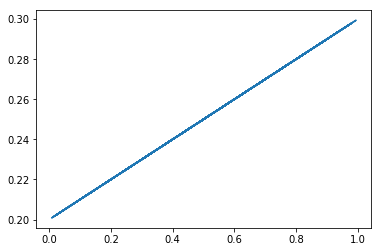

In [21]:
plt.show()